# Clustering

Clustering with scikit-learn using KMeans

In [38]:
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

In [43]:
k_means = cluster.KMeans(n_clusters=3, n_init=10, random_state=1)
k_means.fit(X_iris)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [40]:
# the labels will differ from ground truth
print(k_means.labels_[::10])
print(y_iris[::10])

# this is dumb hardcoding and relies on random_state=1 
mapping_dict = { 0: 1, 1: 0, 2: 2}
predictions = [mapping_dict[x] for x in k_means.labels_]

[1 1 1 1 1 2 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_iris, predictions)

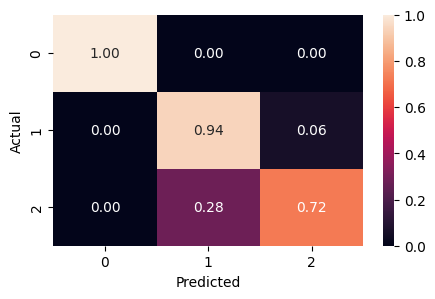

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)